# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [42]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [230]:
# Your work here.
#import seaborn as sns
#sns.boxplot(y=df.temperature)

In [27]:
dfg=df.groupby(by="gender").std()
print(dfg)

        temperature  heart_rate
gender                         
F          0.743488    8.105227
M          0.698756    5.875184


In [25]:
dfg


In [216]:

df.groupby("gender").max()


,temperature,heart_rate
gender,,
F,100.8,89.0
M,99.5,86.0


In [55]:
?sns.boxplot


In [56]:
import matplotlib.pyplot as plt

(array([0.05128205, 0.07692308, 0.12820513, 0.23076923, 0.23076923,
        0.58974359, 0.46153846, 0.56410256, 0.51282051, 0.28205128,
        0.12820513, 0.        , 0.05128205, 0.        , 0.02564103]),
 array([ 96.3,  96.6,  96.9,  97.2,  97.5,  97.8,  98.1,  98.4,  98.7,
         99. ,  99.3,  99.6,  99.9, 100.2, 100.5, 100.8]),
 <a list of 15 Patch objects>)

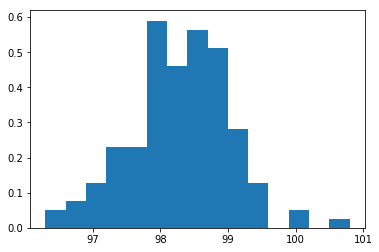

In [60]:
plt.hist(df.temperature, density=True, bins=15)

In [91]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

In [ ]:
# Compute mean and standard deviation: mu, sigma
mu=np.sum(belmont_no_outliers)/len(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)
mu=np.mean(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y             = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


In [64]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates


In [62]:
samples=np.random.choice(df.temperature, 10)

In [152]:
bs=draw_bs_reps(df.temperature, np.mean, 10000)


98.24944261538461
[98.12153846 98.37692308]


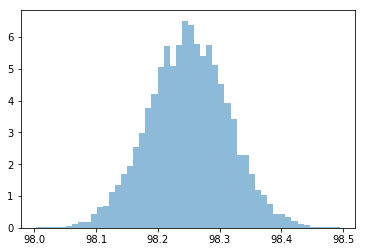

In [229]:
plt.hist(bs, density=True, bins=50, alpha = 0.5)
perc=np.percentile(bs, [2.5,97.5])
plt.plot(x=perc)
plt.plot(x=bs.mean())
print(bs.mean())
print(perc)

In [87]:
bs.mean()

98.24838453846155

In [88]:
(bs.mean()-32)/1.8

36.80465807692308

In [89]:
np.percentile(bs, [2.5,97.5])

array([98.12153846, 98.37307692])

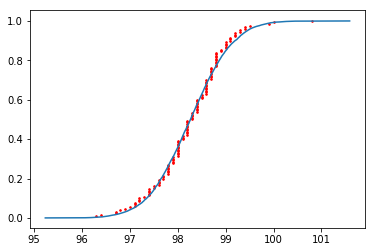

In [102]:
x,y=ecdf(df.temperature)
plt.scatter(x,y, color="red", s=2.5)

sigma=np.std(df.temperature)
mu=np.mean(df.temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples1=np.random.normal(mu,sigma,10000)
x1,y1=ecdf(samples1)
plt.plot(x1,y1)

In [99]:
?plt.scatter


In [108]:
print ("male mean temp is: " + str(df.temperature[df.gender == "M"].mean()))
print ("female mean temp is: " + str(df.temperature[df.gender == "F"].mean()))

male mean temp is: 98.1046153846154
female mean temp is: 98.39384615384613


In [175]:
import scipy.stats as st
z=(df.temperature.mean()-98.6)*(np.sqrt(130 / (bs.std())))
z
pval = 2 * (1 - st.norm.cdf(z))
pval
temp=df.temperature

In [182]:
print(temp.std())
print(temp.mean())
1.96*temp.std()/np.sqrt(130)

0.7331831580389454
98.24923076923078


0.12603665700226638

In [184]:

98.6+(1.96*df.temperature.std())
pval = 2 * (1 - st.norm.cdf(z))

In [183]:
import numpy as np
import scipy.stats as st
import scipy.special as sp
n = 100  # number of coin flips
h = 61  # number of heads
q = .5  # null-hypothesis of fair coin
2.  Let's compute the z-score, which is defined by the following formula (xbar is the estimated average of the distribution). We will explain this formula in the next section, How it works...

xbar = float(h) / n
z = (xbar - q) * np.sqrt(n / (q * (1 - q)))
# We don't want to display more than 4 decimals.
z
 2.2000
3.  Now, from the z-score, we can compute the p-value as follows:

pval = 2 * (1 - st.norm.cdf(z))
pval

SyntaxError: invalid syntax (<ipython-input-183-d77342b7286f>, line 7)

In [227]:
# Make an array of translated temperature
translated_temp = temp-np.mean(temp)+98.6

# Take bootstrap replicates of translated temperature
bst = draw_bs_reps(translated_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature
p = np.sum(bst <= np.mean(temp)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0
